# **TUTORIAL: PROCESS SIMULATION**

In [4]:
# This part of the code only applies for Colab
import sys
import os

if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../")

## ***Create Process Simulation Instance***

In [5]:
from phitter import simulation

# Create a simulation process instance
simulation_example = simulation.ProcessSimulation()

## ***Create a Process to Simulate***

### _Mandatory Information to add_

- `Probability Distribution`: According to the phitter distribution list.
- `Distribution Parameters`: Needed Parameters.
- `Process Id`: Unique name to that process

#### Mandatory but depending on what you need

You can select ***new_brach*** or ***previous_ids*** depending on the context.

- `New Branch`: If that process does not have any preceding process
- `Previus ids`: At least one process preceed that process

### _Optional Fields_

- `Number of Products`: Defaults 1. You can add as many as you need
- `Number of Servers`: Defaults 1. You can add as many as you need

### _Process without preceding process_

Add a new process without preceding process

In [6]:
simulation_example.add_process(
    prob_distribution="normal",
    parameters={"mu": 5, "sigma": 2},
    process_id="first_process",
    new_branch=True,
)

You can also modify the number of products and servers

In [7]:
simulation_example.add_process(
    prob_distribution="normal",
    parameters={"mu": 5, "sigma": 2},
    process_id="first_process_with_optional",
    number_of_products=10,
    number_of_servers=3,
    new_branch=True,
)


### _Process with preceding process_

Add a new process with preceding process

In [8]:
simulation_example.add_process(
    prob_distribution="exponential",
    parameters={"lambda": 4},
    process_id="second_process",
    previous_ids=["first_process"],
)


You can also modify the number of products and servers.

On the other hand, you can add more than 1 previous processes

In [9]:
simulation_example.add_process(
    prob_distribution="exponential",
    parameters={"lambda": 4},
    process_id="second_process_with_optional",
    number_of_products=10,
    number_of_servers=3,
    previous_ids=["first_process", "first_process_with_optional"],
)


### _Complete Process Explanation_

Lets add all the processes.

`Note: The order in which you add each process matters`

In [10]:
# Create a simulation process instance
simulation = simulation.ProcessSimulation()

# Add a new process without preceding process
simulation.add_process(
    prob_distribution="normal",
    parameters={"mu": 5, "sigma": 2},
    process_id="first_process",
    number_of_products=10,
    number_of_servers=3,
    new_branch=True,
)

# Add a new process with preceding process
simulation.add_process(
    prob_distribution="exponential",
    parameters={"lambda": 4},
    process_id="second_process",
    previous_ids=["first_process"],
)

# Add a new process with preceding process
simulation.add_process(
    prob_distribution="gamma",
    parameters={"alpha": 15, "beta": 3},
    process_id="third_process",
    previous_ids=["first_process"],
)

# Add a new process without preceding process
simulation.add_process(
    prob_distribution="exponential",
    parameters={"lambda": 4.3},
    process_id="fourth_process",
    new_branch=True,
)


# Add a new process with preceding process
simulation.add_process(
    prob_distribution="beta",
    parameters={"alpha": 1, "beta": 1, "A": 2, "B": 3},
    process_id="fifth_process",
    previous_ids=["second_process", "fourth_process"],
)

# Add a new process with preceding process
simulation.add_process(
    prob_distribution="normal",
    parameters={"mu": 15, "sigma": 2},
    process_id="sixth_process",
    previous_ids=["third_process", "fifth_process"],
)

Congrats! You have created your process

## ***Graph Process Simulation***

You can review the process that you create with the following line of code

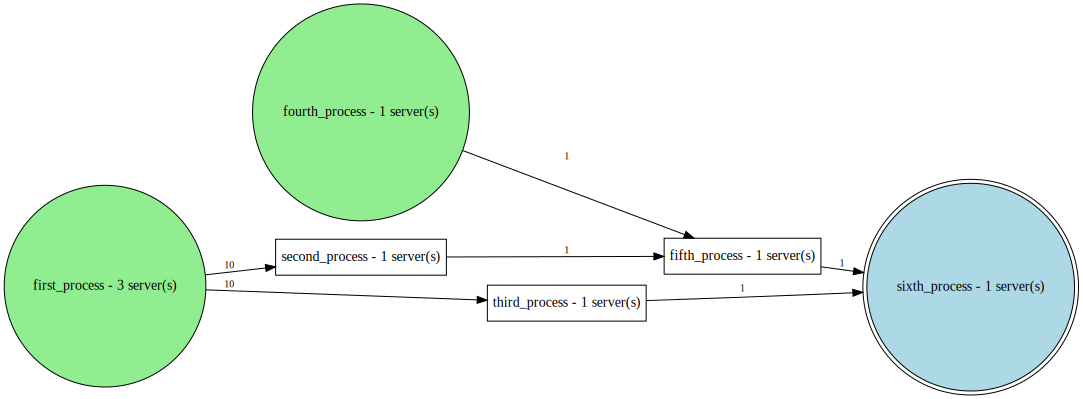

In [11]:
# Graph your process
simulation.process_graph()

This can also help you to review if the order and connections are correct.


You can also:

- Change graph orientation: Defaults 'LR' (Left-Right). It can also be 'TB' (Top-Bottom)
- Save to PDF: Defaults False

## ***Run Simulation***

You just need to add one line of code to run your simulation. Remember to set the number of simulations that you want to have

In [13]:
# Run Simulation
simulation.run(number_of_simulations=100)

,first_process,second_process,third_process,fourth_process,fifth_process,sixth_process,Total Simulation Time
0,17.708014,0.382215,30.895831,0.323938,2.619499,17.818460,66.422305
1,21.985703,0.528399,52.819394,0.009301,2.212952,16.729132,91.534230
2,16.236466,0.618762,46.642931,0.374949,2.258035,12.625241,75.504638
3,21.825852,0.189805,41.482813,0.280809,2.097608,16.366786,79.675451
4,17.464462,0.486846,68.609098,0.211839,2.364155,15.561506,101.635066
...,...,...,...,...,...,...,...
95,12.352080,0.659397,29.802672,0.329799,2.933450,19.222862,61.377613
96,16.140412,0.089761,52.645615,0.171964,2.435034,15.925760,84.711787
97,17.497641,0.025343,41.729730,0.189547,2.426114,13.113625,72.340996
98,19.379314,0.381890,40.308375,0.028314,2.977763,12.200249,71.887938


## ***Simulation Metrics***

After running the simulation you can see different metrics

In [15]:
# Review simulation metrics
simulation.simulation_metrics()

,Metrics,Value
0,Avg. first_process,18.685689
1,Avg. second_process,0.236587
2,Avg. third_process,46.588273
3,Avg. fourth_process,0.188199
4,Avg. fifth_process,2.478694
5,Avg. sixth_process,14.979307
6,Avg. Total Simulation Time,80.253269
7,Std. Dev. first_process,2.578874
8,Std. Dev. second_process,0.217453
9,Std. Dev. third_process,12.911138


## ***Confidence Interval for your Simulation Metrics***

You can also add a confidence interval for your **metrics**. It will create replications of the number of simulations that you add.

In [16]:
# Confidence interval for Simulation metrics
simulation.run_confidence_interval(
    confidence_level=0.99,
    number_of_simulations=100,
    replications=30,
)

,Metrics,LB - Value,AVG - Value,UB - Value
0,Avg. Total Simulation Time,78.000459,78.520335,79.040210
1,Avg. fifth_process,2.494806,2.505953,2.517100
2,Avg. first_process,18.572570,18.679829,18.787089
3,Avg. fourth_process,0.221203,0.234502,0.247801
4,Avg. second_process,0.234160,0.246187,0.258213
5,Avg. sixth_process,14.949940,15.021900,15.093861
6,Avg. third_process,44.344515,44.818605,45.292695
7,Std. Dev. Total Simulation Time,11.472293,11.936236,12.400179
8,Std. Dev. fifth_process,0.280610,0.286808,0.293006
9,Std. Dev. first_process,2.470528,2.546806,2.623085
